## Importando bibliotecas e pré-visualizando o dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
bank_mkt = pd.read_csv("C:/Users/win/Downloads/bank+marketing/bank/bank-full.csv", sep=";")
bank_mkt.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Descobrindo características importantes do dataset: 
- Identificar tipos de dados;
- Colunas com valores duplicados;
- Colunas com valores nulos (Null) e o total de valores nulos;
- Descrição do dataset (média, contagem, etc.);
- Correlação entre colunas.

In [3]:
bank_mkt.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
bank_mkt.duplicated().sum()

np.int64(0)

In [5]:
bank_mkt.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
bank_mkt.isin(["unknown"]).sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [7]:
bank_mkt.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


C:\Users\win\AppData\Local\Temp\ipykernel_7944\1246876707.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(mapa)


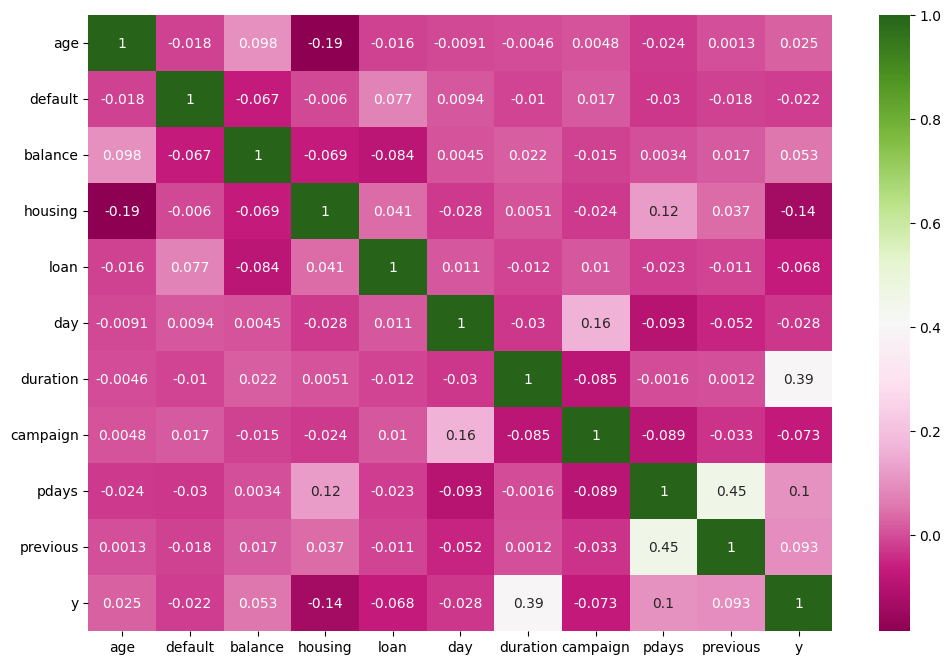

In [8]:
bank_mkt_num = bank_mkt.copy()

mapa = {
    'yes': 1,
    'no': 0,
    'unknown': np.nan
}

bank_mkt_num[['default', 'housing', 'loan', 'y']] = (
    bank_mkt_num[['default', 'housing', 'loan', 'y']]
        .replace(mapa)
        .astype(int)
)

bank_mkt_corr = bank_mkt_num.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(bank_mkt_corr, annot=True, cmap="PiYG")
plt.show()

## Análise univariada:
- Idade (Age);
- Saldo Bancário (Balance);
- Número de Contatos (Campaign).

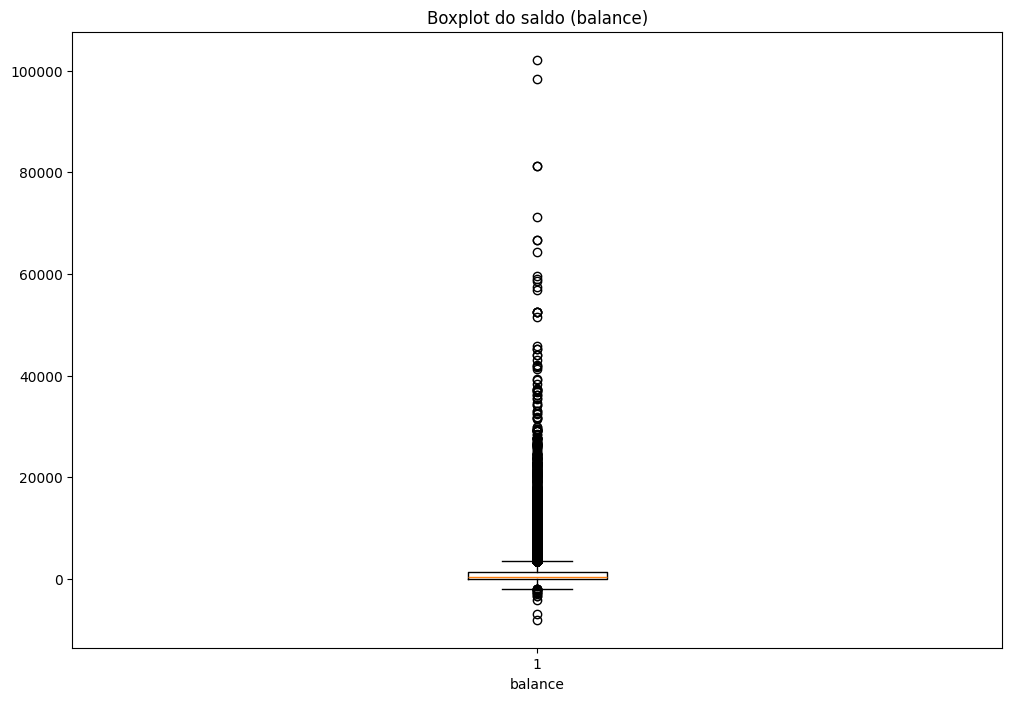

In [9]:
plt.figure(figsize=(12, 8))
plt.boxplot(bank_mkt['balance'])
plt.xlabel("balance")
plt.title("Boxplot do saldo (balance)")
plt.show()

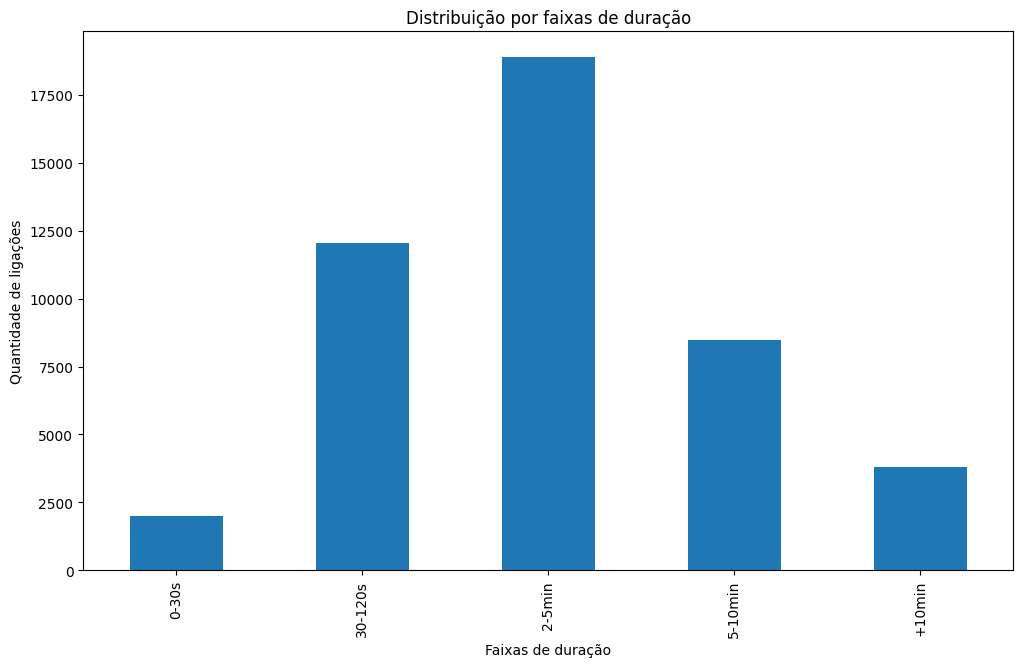

In [10]:
bins = [-1, 30, 120, 300, 600, 9999]
labels = ['0-30s', '30-120s', '2-5min', '5-10min', '+10min']

bank_mkt['duration_bin'] = pd.cut(
    bank_mkt['duration'],
    bins=bins,
    labels=labels
)

bank_mkt['duration_bin'] \
    .value_counts() \
    .reindex(labels) \
    .plot(kind='bar', figsize=(12, 7))

plt.xlabel("Faixas de duração")
plt.ylabel("Quantidade de ligações")
plt.title("Distribuição por faixas de duração")
plt.grid(False)
plt.show()

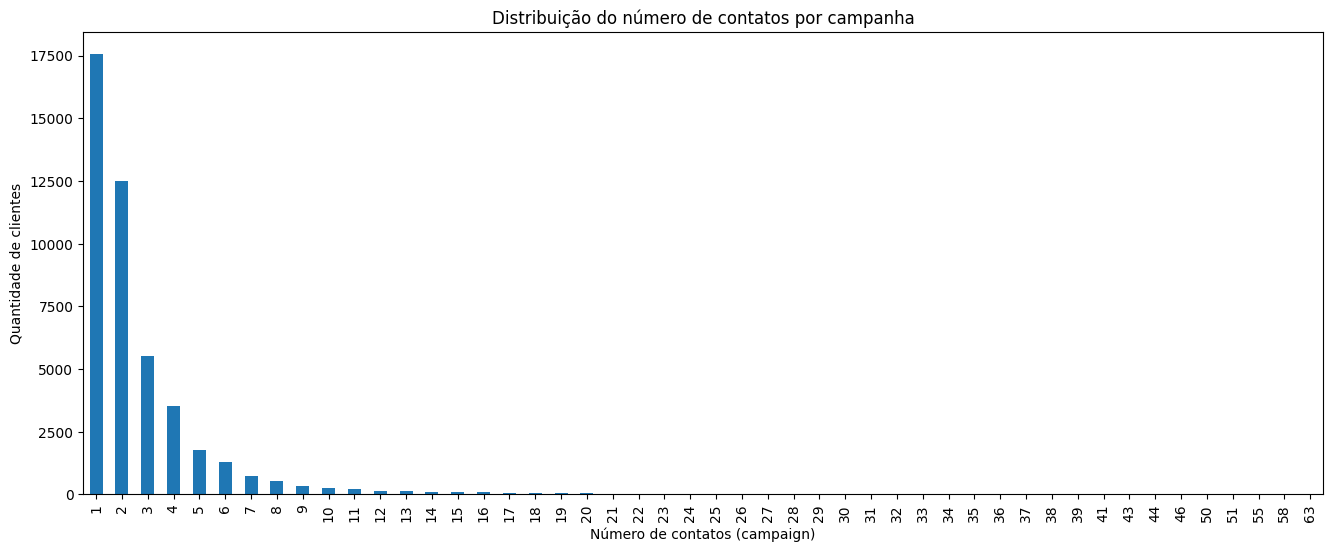

In [11]:
plt.figure(figsize=(16, 6))
bank_mkt['campaign'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Número de contatos (campaign)")
plt.ylabel("Quantidade de clientes")
plt.title("Distribuição do número de contatos por campanha")
plt.show()

## Análise Bivariada: o que mais influencia para uma resposta positiva dos clientes

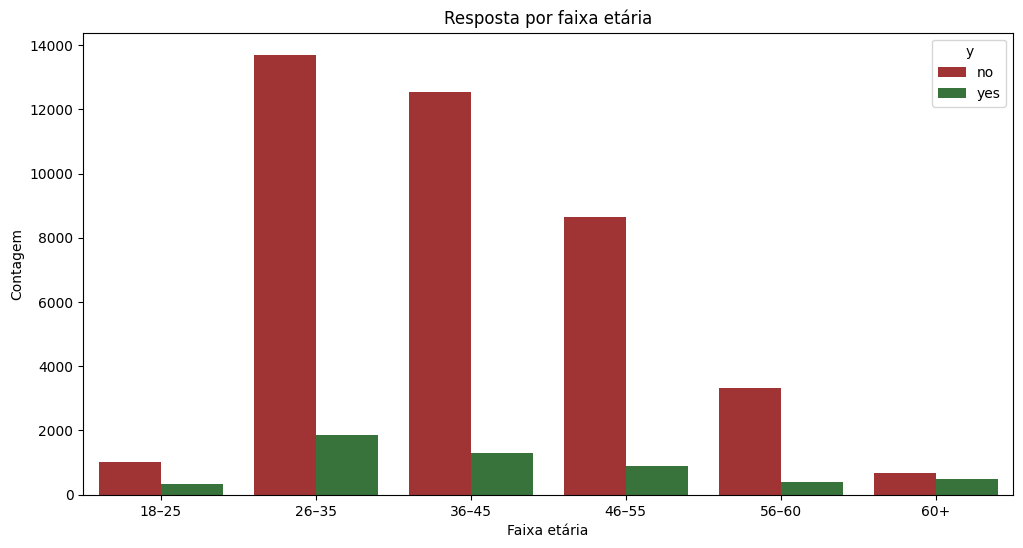

In [12]:
bins = [18, 25, 35, 45, 55, 60, np.inf]
labels = ['18–25', '26–35', '36–45', '46–55', '56–60', '60+']

bank_mkt['age_bin'] = pd.cut(
    bank_mkt['age'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

plt.figure(figsize=(12,6))

sns.countplot(
    data=bank_mkt,
    x='age_bin',
    hue='y',
    palette={'yes': '#2E7D32', 'no': '#B22222'}
)

plt.xlabel("Faixa etária")
plt.ylabel("Contagem")
plt.title("Resposta por faixa etária")
plt.show()

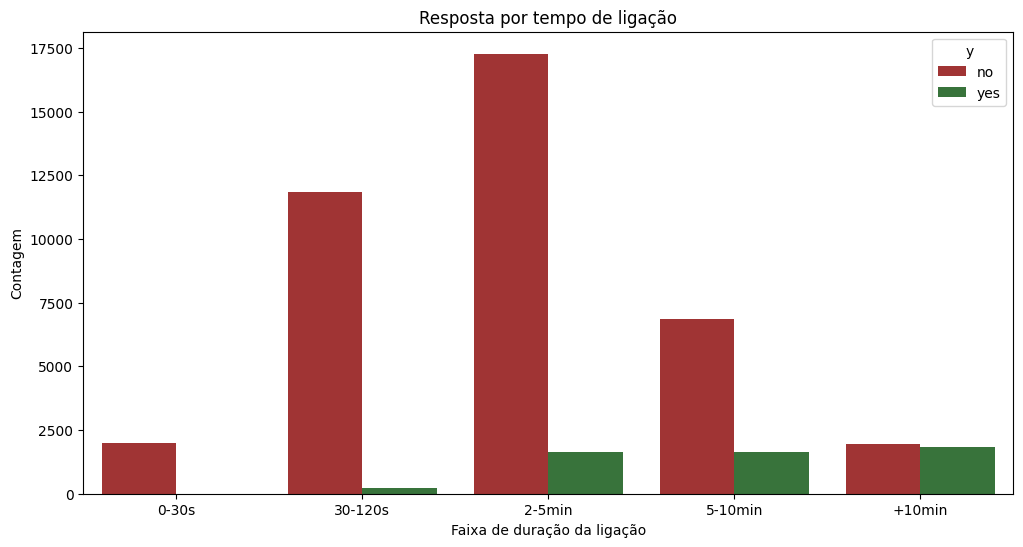

In [13]:
bins = [-1, 30, 120, 300, 600, 9999]
labels = ['0-30s', '30-120s', '2-5min', '5-10min', '+10min']

bank_mkt['duration_bin'] = pd.cut(
    bank_mkt['duration'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)


plt.figure(figsize=(12, 6))

sns.countplot(
    data=bank_mkt,
    x='duration_bin',
    hue='y',
    palette={'yes': '#2E7D32', 'no': '#B22222'}
)

plt.xlabel("Faixa de duração da ligação")
plt.ylabel("Contagem")
plt.title("Resposta por tempo de ligação")
plt.show()

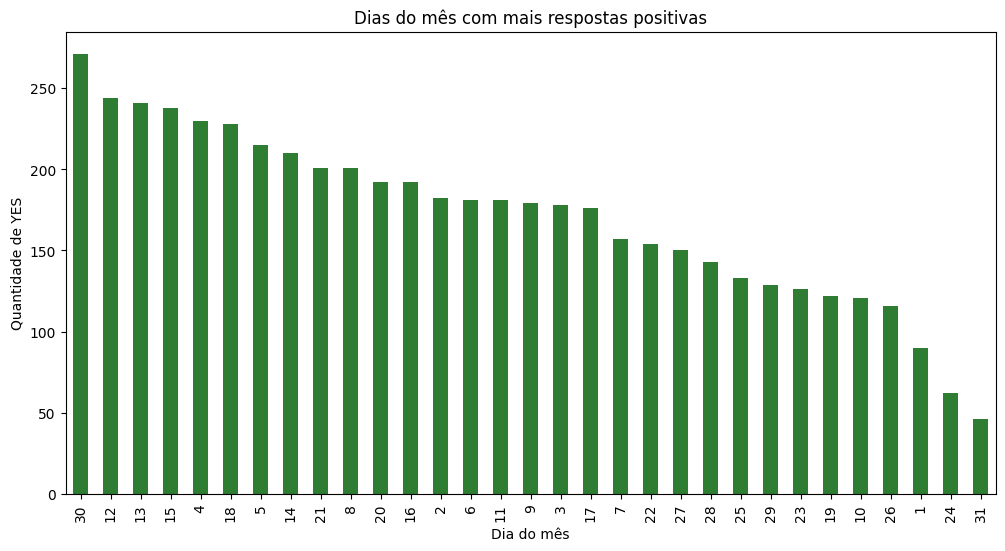

In [14]:
top_days = (
    bank_mkt.query("y == 'yes'")
             .groupby('day')
             .size()
             .sort_values(ascending=False)
)

top_days.plot(kind='bar', color='#2E7D32', figsize=(12,6))
plt.title("Dias do mês com mais respostas positivas")
plt.ylabel("Quantidade de YES")
plt.xlabel("Dia do mês")
plt.show()

## Perfil dos Clientes que responderam positivamente
- Emprego (Job);
- Saldo bancário (Balance);
- Estado Civil (Marriage);
- Cliente tem algum crédito/empréstimo em situação de inadimplência (Default);
- Empréstimo pessoal (Loan);
- Empréstimo de habitação ou financiamento imobiliário (Housing).

In [15]:
top_clients_jobs = (
    bank_mkt.query("y == 'yes'")
            .groupby('job')
            .agg(
                qtd_clientes=('job', 'size'),
                media_salarial=('balance', 'mean')
            )
            .sort_values('qtd_clientes', ascending=False)
)

top_clients_jobs

,qtd_clientes,media_salarial
job,,
management,1301,2140.707917
technician,840,1838.152381
blue-collar,708,1275.420904
admin.,631,1437.283677
retired,516,2690.627907
services,369,1112.344173
student,269,1488.739777
unemployed,202,1334.257426
self-employed,187,2351.807487


In [16]:
clients_marital = (
    bank_mkt.query("y == 'yes'")
            .groupby('marital')
            .agg(
                qtd_clientes=('marital', 'size'),
            )
            .sort_values('qtd_clientes', ascending=False)
)

clients_marital

,qtd_clientes
marital,
married,2755
single,1912
divorced,622


In [17]:
accepted = bank_mkt.query("y == 'yes'")

counts_accepted = pd.DataFrame({
    'default': accepted['default'].value_counts(),
    'loan': accepted['loan'].value_counts(),
    'housing': accepted['housing'].value_counts()
})

counts_accepted

,default,loan,housing
no,5237,4805,3354
yes,52,484,1935
